# Physical Climate Risks Exploratory Data Analysis

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

era5_df = pd.read_csv("data/era_merged_data.csv")
cmip_585_df = pd.read_csv("data/cmip_merged_ssp585_data.csv")
cmip_historical_df = pd.read_csv("data/cmip_merged_historical_data.csv")

print(era5_df.shape, cmip_historical_df.shape, cmip_585_df.shape)

(15341, 19) (23725, 10) (18615, 10)


In [74]:
# Remove unwanted columns from cmip data
cmip_585_df = cmip_585_df.drop(columns=["huss", "rlds", "rsds"])
cmip_historical_df = cmip_historical_df.drop(columns=["huss", "rlds", "rsds"])

print(era5_df.shape, cmip_historical_df.shape, cmip_585_df.shape)

(15341, 19) (23725, 7) (18615, 7)


In [75]:
era5_df.isna()
rows_with_na = era5_df[era5_df.isna().any(axis=1)]
print(rows_with_na["time"].values)

['1980-05-01' '1980-05-02' '1980-05-03' '1980-05-04' '1980-05-05'
 '1980-05-06' '1980-05-07' '1980-05-08' '1980-05-09' '1980-05-10'
 '1980-05-11' '1980-05-12' '1980-05-13' '1980-05-14' '1980-05-15'
 '1980-05-16' '1980-05-17' '1980-05-18' '1980-05-19' '1980-05-20'
 '1980-05-21' '1980-05-22' '1980-05-23' '1980-05-24' '1980-05-25'
 '1980-05-26' '1980-05-27' '1980-05-28' '1980-05-29' '1980-05-30'
 '1980-05-31' '2000-08-01' '2000-08-02' '2000-08-03' '2000-08-04'
 '2000-08-05' '2000-08-06' '2000-08-07' '2000-08-08' '2000-08-09'
 '2000-08-10' '2000-08-11' '2000-08-12' '2000-08-13' '2000-08-14'
 '2000-08-15' '2000-08-16' '2000-08-17' '2000-08-18' '2000-08-19'
 '2000-08-20' '2000-08-21' '2000-08-22' '2000-08-23' '2000-08-24'
 '2000-08-25' '2000-08-26' '2000-08-27' '2000-08-28' '2000-08-29'
 '2000-08-30' '2000-08-31' '2008-03-01' '2008-03-02' '2008-03-03'
 '2008-03-04' '2008-03-05' '2008-03-06' '2008-03-07' '2008-03-08'
 '2008-03-09' '2008-03-10' '2008-03-11' '2008-03-12' '2008-03-13'
 '2008-03-

In [76]:
era5_df.isna()
rows_with_na = era5_df[era5_df.isna().any(axis=1)]
print(rows_with_na["time"].values)

['1980-05-01' '1980-05-02' '1980-05-03' '1980-05-04' '1980-05-05'
 '1980-05-06' '1980-05-07' '1980-05-08' '1980-05-09' '1980-05-10'
 '1980-05-11' '1980-05-12' '1980-05-13' '1980-05-14' '1980-05-15'
 '1980-05-16' '1980-05-17' '1980-05-18' '1980-05-19' '1980-05-20'
 '1980-05-21' '1980-05-22' '1980-05-23' '1980-05-24' '1980-05-25'
 '1980-05-26' '1980-05-27' '1980-05-28' '1980-05-29' '1980-05-30'
 '1980-05-31' '2000-08-01' '2000-08-02' '2000-08-03' '2000-08-04'
 '2000-08-05' '2000-08-06' '2000-08-07' '2000-08-08' '2000-08-09'
 '2000-08-10' '2000-08-11' '2000-08-12' '2000-08-13' '2000-08-14'
 '2000-08-15' '2000-08-16' '2000-08-17' '2000-08-18' '2000-08-19'
 '2000-08-20' '2000-08-21' '2000-08-22' '2000-08-23' '2000-08-24'
 '2000-08-25' '2000-08-26' '2000-08-27' '2000-08-28' '2000-08-29'
 '2000-08-30' '2000-08-31' '2008-03-01' '2008-03-02' '2008-03-03'
 '2008-03-04' '2008-03-05' '2008-03-06' '2008-03-07' '2008-03-08'
 '2008-03-09' '2008-03-10' '2008-03-11' '2008-03-12' '2008-03-13'
 '2008-03-

In [77]:
missing_air_pressure = ['1980-05-01', '1980-05-02', '1980-05-03', '1980-05-04', '1980-05-05',
 '1980-05-06', '1980-05-07', '1980-05-08', '1980-05-09', '1980-05-10',
 '1980-05-11', '1980-05-12', '1980-05-13', '1980-05-14', '1980-05-15',
 '1980-05-16', '1980-05-17', '1980-05-18', '1980-05-19', '1980-05-20',
 '1980-05-21', '1980-05-22', '1980-05-23', '1980-05-24', '1980-05-25',
 '1980-05-26', '1980-05-27', '1980-05-28', '1980-05-29', '1980-05-30',
 '1980-05-31', '2000-08-01', '2000-08-02', '2000-08-03', '2000-08-04',
 '2000-08-05', '2000-08-06', '2000-08-07', '2000-08-08', '2000-08-09',
 '2000-08-10', '2000-08-11', '2000-08-12', '2000-08-13', '2000-08-14',
 '2000-08-15', '2000-08-16', '2000-08-17', '2000-08-18', '2000-08-19',
 '2000-08-20', '2000-08-21', '2000-08-22', '2000-08-23', '2000-08-24',
 '2000-08-25', '2000-08-26', '2000-08-27', '2000-08-28', '2000-08-29',
 '2000-08-30', '2000-08-31', '2008-03-01', '2008-03-02', '2008-03-03',
 '2008-03-04', '2008-03-05', '2008-03-06', '2008-03-07', '2008-03-08',
 '2008-03-09', '2008-03-10', '2008-03-11', '2008-03-12', '2008-03-13',
 '2008-03-14', '2008-03-15', '2008-03-16', '2008-03-17', '2008-03-18',
 '2008-03-19', '2008-03-20', '2008-03-21', '2008-03-22', '2008-03-23',
 '2008-03-24', '2008-03-25', '2008-03-26', '2008-03-27', '2008-03-28',
 '2008-03-29', '2008-03-30', '2008-03-31', '2008-04-01', '2008-04-02',
 '2008-04-03', '2008-04-04', '2008-04-05', '2008-04-06', '2008-04-07',
 '2008-04-08', '2008-04-09', '2008-04-10', '2008-04-11', '2008-04-12',
 '2008-04-13', '2008-04-14', '2008-04-15', '2008-04-16', '2008-04-17',
 '2008-04-18', '2008-04-19', '2008-04-20', '2008-04-21', '2008-04-22',
 '2008-04-23', '2008-04-24', '2008-04-25', '2008-04-26', '2008-04-27',
 '2008-04-28', '2008-04-29', '2008-04-30', '2008-06-01', '2008-06-02',
 '2008-06-03', '2008-06-04', '2008-06-05', '2008-06-06', '2008-06-07',
 '2008-06-08', '2008-06-09', '2008-06-10', '2008-06-11', '2008-06-12',
 '2008-06-13', '2008-06-14', '2008-06-15', '2008-06-16', '2008-06-17',
 '2008-06-18', '2008-06-19', '2008-06-20', '2008-06-21', '2008-06-22',
 '2008-06-23', '2008-06-24', '2008-06-25', '2008-06-26', '2008-06-27',
 '2008-06-28', '2008-06-29', '2008-06-30', '2008-08-01', '2008-08-02',
 '2008-08-03', '2008-08-04', '2008-08-05', '2008-08-06', '2008-08-07',
 '2008-08-08', '2008-08-09', '2008-08-10', '2008-08-11', '2008-08-12',
 '2008-08-13', '2008-08-14', '2008-08-15', '2008-08-16', '2008-08-17',
 '2008-08-18', '2008-08-19', '2008-08-20', '2008-08-21', '2008-08-22',
 '2008-08-23', '2008-08-24', '2008-08-25', '2008-08-26', '2008-08-27',
 '2008-08-28', '2008-08-29', '2008-08-30', '2008-08-31', '2008-10-01',
 '2008-10-02', '2008-10-03', '2008-10-04', '2008-10-05', '2008-10-06',
 '2008-10-07', '2008-10-08', '2008-10-09', '2008-10-10', '2008-10-11',
 '2008-10-12', '2008-10-13', '2008-10-14', '2008-10-15', '2008-10-16',
 '2008-10-17', '2008-10-18', '2008-10-19', '2008-10-20', '2008-10-21',
 '2008-10-22', '2008-10-23', '2008-10-24', '2008-10-25', '2008-10-26',
 '2008-10-27', '2008-10-28', '2008-10-29', '2008-10-30', '2008-10-31',
 '2008-12-01', '2008-12-02', '2008-12-03', '2008-12-04', '2008-12-05',
 '2008-12-06', '2008-12-07', '2008-12-08', '2008-12-09', '2008-12-10',
 '2008-12-11', '2008-12-12', '2008-12-13', '2008-12-14', '2008-12-15',
 '2008-12-16', '2008-12-17', '2008-12-18', '2008-12-19', '2008-12-20',
 '2008-12-21', '2008-12-22', '2008-12-23', '2008-12-24', '2008-12-25',
 '2008-12-26', '2008-12-27', '2008-12-28', '2008-12-29', '2008-12-30',
 '2008-12-31', '2009-02-01', '2009-02-02', '2009-02-03', '2009-02-04',
 '2009-02-05', '2009-02-06', '2009-02-07', '2009-02-08', '2009-02-09',
 '2009-02-10', '2009-02-11', '2009-02-12', '2009-02-13', '2009-02-14',
 '2009-02-15', '2009-02-16', '2009-02-17', '2009-02-18', '2009-02-19',
 '2009-02-20', '2009-02-21', '2009-02-22', '2009-02-23', '2009-02-24',
 '2009-02-25', '2009-02-26', '2009-02-27', '2009-02-28', '2010-02-01',
 '2010-02-02', '2010-02-03', '2010-02-04', '2010-02-05', '2010-02-06',
 '2010-02-07', '2010-02-08', '2010-02-09', '2010-02-10', '2010-02-11',
 '2010-02-12', '2010-02-13', '2010-02-14', '2010-02-15', '2010-02-16',
 '2010-02-17', '2010-02-18', '2010-02-19', '2010-02-20', '2010-02-21',
 '2010-02-22', '2010-02-23', '2010-02-24', '2010-02-25', '2010-02-26',
 '2010-02-27', '2010-02-28', '2011-02-01', '2011-02-02', '2011-02-03',
 '2011-02-04', '2011-02-05', '2011-02-06', '2011-02-07', '2011-02-08',
 '2011-02-09', '2011-02-10', '2011-02-11', '2011-02-12', '2011-02-13',
 '2011-02-14', '2011-02-15', '2011-02-16', '2011-02-17', '2011-02-18',
 '2011-02-19', '2011-02-20', '2011-02-21', '2011-02-22', '2011-02-23',
 '2011-02-24', '2011-02-25', '2011-02-26', '2011-02-27', '2011-02-28',
 '2012-02-01', '2012-02-02', '2012-02-03', '2012-02-04', '2012-02-05',
 '2012-02-06', '2012-02-07', '2012-02-08', '2012-02-09', '2012-02-10',
 '2012-02-11', '2012-02-12', '2012-02-13', '2012-02-14', '2012-02-15',
 '2012-02-16', '2012-02-17', '2012-02-18', '2012-02-19', '2012-02-20',
 '2012-02-21', '2012-02-22', '2012-02-23', '2012-02-24', '2012-02-25',
 '2012-02-26', '2012-02-27', '2012-02-28', '2012-02-29', '2017-03-01',
 '2017-03-02', '2017-03-03', '2017-03-04', '2017-03-05', '2017-03-06',
 '2017-03-07', '2017-03-08', '2017-03-09', '2017-03-10', '2017-03-11',
 '2017-03-12', '2017-03-13', '2017-03-14', '2017-03-15', '2017-03-16',
 '2017-03-17', '2017-03-18', '2017-03-19', '2017-03-20', '2017-03-21',
 '2017-03-22', '2017-03-23', '2017-03-24', '2017-03-25', '2017-03-26',
 '2017-03-27', '2017-03-28', '2017-03-29', '2017-03-30', '2017-03-31']

months_array = []
for date in missing_air_pressure:
    months_array.append(date[0:-3])


months = set(months_array)

print(months)

{'2008-04', '2008-12', '2012-02', '2008-06', '2000-08', '2009-02', '2010-02', '2011-02', '2008-03', '2017-03', '1980-05', '2008-10', '2008-08'}


In [78]:
rows_with_na_in_2 = era5_df[era5_df['air_pressure_at_mean_sea_level_mean'].isna()]
rows_with_na_in_2

,time,air_pressure_at_mean_sea_level_mean,air_pressure_at_mean_sea_level_max,air_pressure_at_mean_sea_level_min,wind_speed_at_100m_mean,wind_speed_at_100m_min,wind_speed_at_100m_max,wind_speed_at_10m_mean,wind_speed_at_10m_min,wind_speed_at_10m_max,wind_direction_at_100m_mean,wind_direction_at_10m_mean,air_temperature_at_2_metres_1hour_Maximum_max,air_temperature_at_2_metres_1hour_Minimum_min,precipitation_amount_1hour_Accumulation_sum,precipitation_amount_1hour_Accumulation_min,precipitation_amount_1hour_Accumulation_max,precipitation_above_0_sum,air_temperature_at_2_metres_1hour_Mean
486,1980-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.8500,10.2875,10.559082,0.00000,1.892090,23,12.06875
487,1980-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.4125,9.1000,2.319336,0.00000,0.244141,19,13.75625
488,1980-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.9750,6.1625,0.732422,0.00000,0.366211,6,13.06875
489,1980-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.6625,9.2250,0.549316,0.00000,0.244141,3,15.44375
490,1980-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.8500,8.2250,0.000000,0.00000,0.000000,0,15.53750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13965,2017-03-27,NaN,NaN,NaN,4.740799,0.375000,8.776967,2.923518,0.318689,5.728902,261.039134,264.271800,19.0375,4.1625,0.000000,0.00000,0.000000,0,11.60000
13966,2017-03-28,NaN,NaN,NaN,8.902372,6.496694,11.183309,5.490020,3.729108,6.645605,154.119476,155.588799,18.3500,7.6000,20.263672,0.00000,4.028320,13,12.97500
13967,2017-03-29,NaN,NaN,NaN,11.927451,7.972609,16.903333,7.704462,4.577885,10.901011,250.752534,253.485312,9.8500,6.2250,21.484375,0.12207,2.441406,24,8.03750
13968,2017-03-30,NaN,NaN,NaN,8.365845,2.451084,12.331679,5.530322,1.957557,8.032162,300.925450,301.993592,17.0375,4.4750,2.563477,0.00000,0.854492,6,10.75625


## Once Errors Fixed

In [79]:
# temporarily, code out or delete in future:

era5_df = era5_df.dropna()

Unity CMIP6 and then resplit along the same axis as ERA5

In [80]:
# change time to datetime
era5_df["time"] = pd.to_datetime(era5_df["time"])
cmip_historical_df["time"] = pd.to_datetime(cmip_historical_df["time"])
cmip_585_df["time"] = pd.to_datetime(cmip_585_df["time"])

### Possible Technique to Split the Times

In [81]:
# cmip_df = pd.concat([cmip_historical_df, cmip_585_df])

# # split the data into during and post ERA5
# cmip_historical_df = cmip_df[cmip_df["time"] <= "2020-12-31"]
# cmip_585_df = cmip_df[cmip_df["time"] > "2020-12-31"]
# cmip_585_df

establish a time column

In [82]:
# define relevant constants

HUB_HEIGHT = 65
KELVIN_TO_C = -273.15

In [83]:
era5_df["sfcWind_ERA5_65m"] = era5_df["wind_speed_at_10m_mean"] * (HUB_HEIGHT / 10) ** 0.143
era5_df

,time,air_pressure_at_mean_sea_level_mean,air_pressure_at_mean_sea_level_max,air_pressure_at_mean_sea_level_min,wind_speed_at_100m_mean,wind_speed_at_100m_min,wind_speed_at_100m_max,wind_speed_at_10m_mean,wind_speed_at_10m_min,wind_speed_at_10m_max,wind_direction_at_100m_mean,wind_direction_at_10m_mean,air_temperature_at_2_metres_1hour_Maximum_max,air_temperature_at_2_metres_1hour_Minimum_min,precipitation_amount_1hour_Accumulation_sum,precipitation_amount_1hour_Accumulation_min,precipitation_amount_1hour_Accumulation_max,precipitation_above_0_sum,air_temperature_at_2_metres_1hour_Mean,sfcWind_ERA5_65m
0,1979-01-01,1038.209112,1041.22440,1034.49000,8.472348,6.312500,10.125772,5.182410,3.914117,6.267787,275.893383,277.157559,-13.7125,-17.7125,0.183105,0.0,0.061035,3,-15.71250,6.772958
1,1979-01-02,1037.241875,1040.87440,1030.95250,7.119552,0.731544,10.119597,3.434346,0.690335,4.915298,294.795321,301.118941,-5.6500,-19.5250,0.000000,0.0,0.000000,0,-12.58750,4.488391
2,1979-01-03,1032.282510,1035.24940,1030.50250,3.190732,0.922801,6.356898,2.324394,0.814900,4.244482,116.425202,136.488211,-2.5875,-15.4625,0.000000,0.0,0.000000,0,-9.02500,3.037780
3,1979-01-04,1035.219973,1038.43500,1031.02560,4.790283,2.766993,6.891174,3.068323,1.962540,4.305248,171.110555,182.896277,-7.4625,-14.4625,0.000000,0.0,0.000000,0,-10.96250,4.010031
4,1979-01-05,1039.726512,1041.97060,1035.17750,4.389742,0.712610,6.930458,3.119730,0.576222,4.969438,226.698226,227.135930,-8.7125,-16.8375,0.793457,0.0,0.122070,11,-12.77500,4.077215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1008.545571,1017.07625,1002.18810,8.410372,4.066825,13.618978,4.990377,2.250868,8.322128,202.589002,216.903260,11.0375,0.4125,0.000000,0.0,0.000000,0,5.72500,6.521988
15337,2020-12-28,1025.167192,1030.54625,1018.19940,5.611976,3.791953,7.542070,3.286470,1.760016,5.703960,170.783800,173.938920,9.1000,-0.4625,0.000000,0.0,0.000000,0,4.31875,4.295130
15338,2020-12-29,1019.596896,1027.43310,1008.16810,7.350353,3.758844,10.215835,4.624979,1.600781,6.401294,122.637011,123.857979,10.9750,-1.1500,4.394531,0.0,1.220703,13,4.91250,6.044445
15339,2020-12-30,1022.506900,1027.90560,1011.97375,6.911889,3.473111,10.566013,4.112453,1.664191,6.232789,287.970844,290.841431,10.4125,-3.7750,1.220703,0.0,0.732422,4,3.31875,5.374617


In [84]:
era5_df["sfcWind_ERA5_65m_max"] = era5_df["wind_speed_at_10m_max"] * (HUB_HEIGHT / 10) ** 0.143
era5_df

,time,air_pressure_at_mean_sea_level_mean,air_pressure_at_mean_sea_level_max,air_pressure_at_mean_sea_level_min,wind_speed_at_100m_mean,wind_speed_at_100m_min,wind_speed_at_100m_max,wind_speed_at_10m_mean,wind_speed_at_10m_min,wind_speed_at_10m_max,...,wind_direction_at_10m_mean,air_temperature_at_2_metres_1hour_Maximum_max,air_temperature_at_2_metres_1hour_Minimum_min,precipitation_amount_1hour_Accumulation_sum,precipitation_amount_1hour_Accumulation_min,precipitation_amount_1hour_Accumulation_max,precipitation_above_0_sum,air_temperature_at_2_metres_1hour_Mean,sfcWind_ERA5_65m,sfcWind_ERA5_65m_max
0,1979-01-01,1038.209112,1041.22440,1034.49000,8.472348,6.312500,10.125772,5.182410,3.914117,6.267787,...,277.157559,-13.7125,-17.7125,0.183105,0.0,0.061035,3,-15.71250,6.772958,8.191451
1,1979-01-02,1037.241875,1040.87440,1030.95250,7.119552,0.731544,10.119597,3.434346,0.690335,4.915298,...,301.118941,-5.6500,-19.5250,0.000000,0.0,0.000000,0,-12.58750,4.488391,6.423866
2,1979-01-03,1032.282510,1035.24940,1030.50250,3.190732,0.922801,6.356898,2.324394,0.814900,4.244482,...,136.488211,-2.5875,-15.4625,0.000000,0.0,0.000000,0,-9.02500,3.037780,5.547167
3,1979-01-04,1035.219973,1038.43500,1031.02560,4.790283,2.766993,6.891174,3.068323,1.962540,4.305248,...,182.896277,-7.4625,-14.4625,0.000000,0.0,0.000000,0,-10.96250,4.010031,5.626583
4,1979-01-05,1039.726512,1041.97060,1035.17750,4.389742,0.712610,6.930458,3.119730,0.576222,4.969438,...,227.135930,-8.7125,-16.8375,0.793457,0.0,0.122070,11,-12.77500,4.077215,6.494622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1008.545571,1017.07625,1002.18810,8.410372,4.066825,13.618978,4.990377,2.250868,8.322128,...,216.903260,11.0375,0.4125,0.000000,0.0,0.000000,0,5.72500,6.521988,10.876295
15337,2020-12-28,1025.167192,1030.54625,1018.19940,5.611976,3.791953,7.542070,3.286470,1.760016,5.703960,...,173.938920,9.1000,-0.4625,0.000000,0.0,0.000000,0,4.31875,4.295130,7.454578
15338,2020-12-29,1019.596896,1027.43310,1008.16810,7.350353,3.758844,10.215835,4.624979,1.600781,6.401294,...,123.857979,10.9750,-1.1500,4.394531,0.0,1.220703,13,4.91250,6.044445,8.365933
15339,2020-12-30,1022.506900,1027.90560,1011.97375,6.911889,3.473111,10.566013,4.112453,1.664191,6.232789,...,290.841431,10.4125,-3.7750,1.220703,0.0,0.732422,4,3.31875,5.374617,8.145711


In [85]:
cmip_historical_df["sfcWind_65m"] = cmip_historical_df["sfcWind"] * (HUB_HEIGHT / 10) ** 0.143
cmip_585_df["sfcWind_65m"] = cmip_585_df["sfcWind"] * (HUB_HEIGHT / 10) ** 0.143
cmip_historical_df

,time,hurs,pr,sfcWind,tas,tasmax,tasmin,sfcWind_65m
0,1950-01-01 12:00:00,73.464110,0.000000,6.765776,281.406525,289.54385,273.26920,8.842279
1,1950-01-02 12:00:00,79.738070,0.000000,2.511295,273.670655,282.19498,265.14633,3.282043
2,1950-01-03 12:00:00,58.061028,0.000000,3.630700,267.806000,274.74423,260.86777,4.745009
3,1950-01-04 12:00:00,50.344666,0.000000,4.918969,271.002410,276.35184,265.65298,6.428663
4,1950-01-05 12:00:00,62.418137,0.000000,1.498466,273.062590,276.50412,269.62106,1.958365
...,...,...,...,...,...,...,...,...
23720,2014-12-27 12:00:00,87.401970,0.363228,3.953203,275.440740,281.36900,269.51248,5.166492
23721,2014-12-28 12:00:00,85.896660,0.000000,5.163706,274.985505,277.94708,272.02393,6.748514
23722,2014-12-29 12:00:00,81.443260,0.000000,3.272115,270.881430,278.08716,263.67570,4.276370
23723,2014-12-30 12:00:00,66.947260,0.000000,5.916859,278.274560,283.46432,273.08480,7.732818


In [86]:
era5_df[era5_df["sfcWind_ERA5_65m_max"] > 20]

,time,air_pressure_at_mean_sea_level_mean,air_pressure_at_mean_sea_level_max,air_pressure_at_mean_sea_level_min,wind_speed_at_100m_mean,wind_speed_at_100m_min,wind_speed_at_100m_max,wind_speed_at_10m_mean,wind_speed_at_10m_min,wind_speed_at_10m_max,...,wind_direction_at_10m_mean,air_temperature_at_2_metres_1hour_Maximum_max,air_temperature_at_2_metres_1hour_Minimum_min,precipitation_amount_1hour_Accumulation_sum,precipitation_amount_1hour_Accumulation_min,precipitation_amount_1hour_Accumulation_max,precipitation_above_0_sum,air_temperature_at_2_metres_1hour_Mean,sfcWind_ERA5_65m,sfcWind_ERA5_65m_max
3003,1987-03-23,997.343442,1001.20440,994.8819,14.789576,3.853773,23.209053,9.267450,2.035812,15.711883,...,245.254357,16.2250,-0.4000,30.151367,0.183105,3.601074,24,7.9125,12.111749,20.534062
6139,1995-10-23,1009.966275,1021.65060,991.1725,15.902195,10.712507,22.183626,10.658180,5.803084,15.721825,...,276.189119,27.6625,3.4125,0.549316,0.000000,0.366211,4,15.5375,13.929312,20.547054
8136,2001-04-11,992.194296,1004.11810,985.1956,16.552008,11.005148,22.757554,11.017501,6.285524,15.930758,...,137.020207,22.3500,7.4750,13.427734,0.000000,7.202148,6,14.9125,14.398913,20.820112
11792,2011-04-15,1009.131825,1012.44875,1005.7250,18.821593,12.723164,23.675541,12.819687,8.705691,16.715449,...,308.986858,13.4125,3.7875,2.441406,0.000000,0.427246,13,8.6000,16.754213,21.845635


There have been 4 instances of wind speed breaching 20m/s from 1987 to 2011. And those have only just been over. It is unlikely a 10 min average wind speed in the region would have occured to automatically switch the turbine off. Now to analyse this same metric across CMIP6:

Percentile Calculation:

In [87]:
windspeed_shutdown_day_percentage = era5_df[era5_df["sfcWind_ERA5_65m_max"] > 20].shape[0] / era5_df.shape[0]
print("Windspeed Breach Percentile:", windspeed_shutdown_day_percentage * 100)

# Calculate the value at the given percentile
windspeed_shutdown_percentile_value = cmip_historical_df["sfcWind_65m"].quantile(1 - windspeed_shutdown_day_percentage)
print("Windspeed Breach CMIP Value:", windspeed_shutdown_percentile_value)

# Filter the rows where the column's value is above the percentile value
cmip_forecast_windspeed_breaches_df = cmip_585_df[cmip_585_df["sfcWind_65m"] > windspeed_shutdown_percentile_value]

cmip_forecast_windspeed_breaches_df["windspeed_shutdown"] = 1
cmip_forecast_windspeed_breaches_df

Windspeed Breach Percentile: 0.02675406327335964
Windspeed Breach CMIP Value: 13.983807210852644


C:\Users\Bradley.Johnson\AppData\Local\Temp\ipykernel_21252\3350513479.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmip_forecast_windspeed_breaches_df["windspeed_shutdown"] = 1


,time,hurs,pr,sfcWind,tas,tasmax,tasmin,sfcWind_65m,windspeed_shutdown
5165,2029-02-25 12:00:00,57.674847,0.194725,11.035825,267.203350,272.11480,262.29190,14.422861,1
9910,2042-02-25 12:00:00,93.639880,12.762601,11.442708,271.619910,274.78200,268.45782,14.954622,1
16478,2060-02-23 12:00:00,99.295110,11.083151,11.323438,269.130585,270.48734,267.77383,14.798746,1


## High Temperature Analysis

Check to see which days the air temperature is too high and shuts down the turbines historically in ERA5

In [88]:
# convert CMIP values to C from kelvin
cmip_historical_df["tas"] = cmip_historical_df["tas"] + KELVIN_TO_C
cmip_585_df["tas"] = cmip_585_df["tas"] + KELVIN_TO_C
cmip_historical_df["tasmin"] = cmip_historical_df["tasmin"] + KELVIN_TO_C
cmip_585_df["tasmin"] = cmip_585_df["tasmin"] + KELVIN_TO_C
cmip_historical_df["tasmax"] = cmip_historical_df["tasmax"] + KELVIN_TO_C
cmip_585_df["tasmax"] = cmip_585_df["tasmax"] + KELVIN_TO_C

In [89]:
era5_df[era5_df["air_temperature_at_2_metres_1hour_Maximum_max"] > 40]

,time,air_pressure_at_mean_sea_level_mean,air_pressure_at_mean_sea_level_max,air_pressure_at_mean_sea_level_min,wind_speed_at_100m_mean,wind_speed_at_100m_min,wind_speed_at_100m_max,wind_speed_at_10m_mean,wind_speed_at_10m_min,wind_speed_at_10m_max,...,wind_direction_at_10m_mean,air_temperature_at_2_metres_1hour_Maximum_max,air_temperature_at_2_metres_1hour_Minimum_min,precipitation_amount_1hour_Accumulation_sum,precipitation_amount_1hour_Accumulation_min,precipitation_amount_1hour_Accumulation_max,precipitation_above_0_sum,air_temperature_at_2_metres_1hour_Mean,sfcWind_ERA5_65m,sfcWind_ERA5_65m_max
932,1981-07-21,1010.423940,1013.20060,1004.28190,6.161797,1.767767,9.722718,3.767191,1.078917,7.338362,...,140.769338,40.3500,22.0375,0.732422,0.0,0.610352,3,31.19375,4.923391,9.590600
7116,1998-06-26,1002.585048,1004.63750,998.76500,11.784543,7.195105,15.113761,7.739588,3.513923,9.430047,...,70.294436,40.4750,27.5375,0.000000,0.0,0.000000,0,34.00625,10.114966,12.324249
7119,1998-06-29,1007.102033,1009.34250,1003.28690,7.754158,1.457738,10.141383,4.957499,0.687500,6.896557,...,50.443637,41.1625,25.8500,0.000000,0.0,0.000000,0,33.50625,6.479019,9.013199
7120,1998-06-30,1011.437265,1015.51190,1003.84940,9.061424,4.474319,12.245694,5.899172,2.208825,7.541811,...,202.599392,40.6625,23.6000,0.549316,0.0,0.427246,3,32.13125,7.709704,9.856489
12230,2012-06-26,1007.064554,1009.03190,1002.90060,10.002835,7.860353,11.356613,6.115839,4.155193,8.350009,...,72.959461,40.8500,24.5375,0.000000,0.0,0.000000,0,32.69375,7.992868,10.912734
12231,2012-06-27,1006.188258,1008.78750,1002.53940,11.012493,8.639707,13.416990,6.990413,3.961731,8.067101,...,74.333882,41.0375,27.1625,0.000000,0.0,0.000000,0,34.10000,9.135861,10.542998
12232,2012-06-28,1009.848856,1012.74125,1004.96875,9.370640,6.670832,13.365066,5.996221,4.110296,8.025837,...,86.252691,40.2250,24.9750,0.000000,0.0,0.000000,0,32.60000,7.836538,10.489069


This is infrequent (7 days across the data range), but has occured

In [90]:
# Calculate the percentage of days in ERA5 with a maximum temperature exceeding  40 degrees Celsius  (e.g. 7% of days). 
temperature_slowdown_day_percentage = era5_df[era5_df["air_temperature_at_2_metres_1hour_Maximum_max"] > 40].shape[0] / era5_df.shape[0]
temperature_slowdown_day_percentage
print("Temp Slowdown Breach CMIP Value:", temperature_slowdown_day_percentage)

# Find the corresponding percentile of maximum temperature in the CMIP6 historical simulation (i.e. quantile(tasmax,0.93)). This is our threshold CMIP6 for reduced efficiency.
# Calculate the value at the given percentile
percentile_temp_max_value = cmip_historical_df["tasmax"].quantile(1 -temperature_slowdown_day_percentage)
print("Temp Slowdown Breach CMIP Value:", percentile_temp_max_value)

# Calculate the percentage of days in SSP5-85 (2035-2065) exceed the threshold maximum temperature in the above step. 
cmip_forecast_temp_max_breaches_df = cmip_585_df[cmip_585_df["tasmax"] > percentile_temp_max_value]

cmip_forecast_temp_max_breaches_df["temp_max_slowdown"] = 1
cmip_forecast_temp_max_breaches_df

Temp Slowdown Breach CMIP Value: 0.0004681961072837937
Temp Slowdown Breach CMIP Value: 41.90126560096362


C:\Users\Bradley.Johnson\AppData\Local\Temp\ipykernel_21252\1742328798.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmip_forecast_temp_max_breaches_df["temp_max_slowdown"] = 1


,time,hurs,pr,sfcWind,tas,tasmax,tasmin,sfcWind_65m,temp_max_slowdown
554,2016-07-09 12:00:00,41.968422,0.000000,4.418561,32.341105,42.60977,22.07244,5.774674,1
555,2016-07-10 12:00:00,35.943893,0.000000,5.059484,33.722400,42.19240,25.25240,6.612304,1
940,2017-07-30 12:00:00,47.676926,0.000000,3.343051,31.395925,41.91570,20.87615,4.369076,1
1296,2018-07-21 12:00:00,39.277035,0.000000,4.516598,32.973260,42.59420,23.35232,5.902799,1
1297,2018-07-22 12:00:00,29.639143,0.000000,3.273919,34.092370,42.28207,25.90267,4.278727,1
...,...,...,...,...,...,...,...,...,...
18484,2065-08-23 12:00:00,30.544882,0.000000,3.722864,35.698915,43.30790,28.08993,4.865458,1
18485,2065-08-24 12:00:00,33.530983,0.000000,3.778300,35.500865,42.05267,28.94906,4.937909,1
18490,2065-08-29 12:00:00,36.767887,0.000000,1.753922,32.748120,43.00110,22.49514,2.292223,1
18491,2065-08-30 12:00:00,36.428856,0.000000,4.127758,34.052360,42.62810,25.47662,5.394619,1


There are 541 days from 2015 to 2065 expected to breach the max temperature for efficient operation, resulting in a 50% slowdown of the turbine for safety.

## Minimum Temperature Analysis

Turbines are not designed to operate at temperatures below - 20C degrees Celsius

Turbines are shutdown to prevent damage to asset

Turbines shut down when temperature drops below -20C

Turbin shut down for full 24 hours if minimum temperature below threshold

[Note possible that on coldwave days there are very low wind speeds, and windfarm would not generate power?]

In [91]:
era5_df[era5_df["air_temperature_at_2_metres_1hour_Minimum_min"] < -20]

,time,air_pressure_at_mean_sea_level_mean,air_pressure_at_mean_sea_level_max,air_pressure_at_mean_sea_level_min,wind_speed_at_100m_mean,wind_speed_at_100m_min,wind_speed_at_100m_max,wind_speed_at_10m_mean,wind_speed_at_10m_min,wind_speed_at_10m_max,...,wind_direction_at_10m_mean,air_temperature_at_2_metres_1hour_Maximum_max,air_temperature_at_2_metres_1hour_Minimum_min,precipitation_amount_1hour_Accumulation_sum,precipitation_amount_1hour_Accumulation_min,precipitation_amount_1hour_Accumulation_max,precipitation_above_0_sum,air_temperature_at_2_metres_1hour_Mean,sfcWind_ERA5_65m,sfcWind_ERA5_65m_max
13,1979-01-14,1034.735235,1038.35310,1030.55690,6.332398,2.257799,10.459931,3.130007,1.118034,5.738099,...,251.171609,-14.9625,-23.7750,0.000000,0.0,0.000000,0,-19.36875,4.090647,7.499195
1132,1982-02-06,1036.836923,1039.18560,1031.90310,8.091165,6.659404,9.573931,3.822982,3.005204,4.753699,...,238.542278,-10.1500,-23.4000,0.000000,0.0,0.000000,0,-16.77500,4.996304,6.212670
1815,1983-12-21,1027.926463,1031.68940,1020.29375,6.327622,3.502231,9.250000,4.746272,2.699103,6.601373,...,260.528859,-7.2750,-20.1500,4.211426,0.0,0.427246,23,-13.71250,6.202963,8.627419
1816,1983-12-22,1032.154237,1034.75875,1027.84940,4.582409,1.007782,7.967218,3.419154,0.812500,5.970304,...,200.910092,-14.1500,-20.5875,0.732422,0.0,0.305176,7,-17.36875,4.468536,7.802667
1817,1983-12-23,1031.695054,1039.69190,1027.52250,5.621116,2.711376,9.818072,4.267829,2.236068,7.268565,...,195.481083,-15.9000,-20.0250,0.732422,0.0,0.061035,12,-17.96250,5.577680,9.499380
1818,1983-12-24,1050.926402,1057.51310,1041.33690,6.748911,2.926175,9.841121,5.020771,2.292992,7.022564,...,273.557524,-17.5875,-20.7750,1.403809,0.0,0.122070,18,-19.18125,6.561710,9.177879
1843,1984-01-18,1036.600390,1040.09500,1031.63750,4.782828,2.444701,7.680383,3.004337,1.700184,5.460440,...,222.370355,-13.2125,-20.2750,3.540039,0.0,0.671387,12,-16.74375,3.926406,7.136319
1844,1984-01-19,1032.492785,1035.97000,1029.91125,5.325764,1.060660,8.049893,2.621087,1.030776,3.670512,...,104.431245,-13.9000,-25.9000,0.000000,0.0,0.000000,0,-19.90000,3.425532,4.797039
2224,1985-02-02,1023.801325,1026.05310,1021.05625,6.368503,3.700190,7.746471,3.516859,1.816805,5.590170,...,113.838525,-5.1500,-20.2750,0.061035,0.0,0.061035,1,-12.71250,4.596228,7.305865
3294,1988-01-08,1025.262533,1028.11625,1023.50310,3.660595,0.312500,6.056053,3.003800,2.183031,4.012675,...,206.592834,-13.5875,-22.5875,0.122070,0.0,0.122070,1,-18.08750,3.925705,5.244217


In [92]:
era_historic_subzero_df = era5_df[era5_df["air_temperature_at_2_metres_1hour_Minimum_min"] < 0]
era_historic_subzero_df[era_historic_subzero_df["precipitation_amount_1hour_Accumulation_sum"] > 0]

,time,air_pressure_at_mean_sea_level_mean,air_pressure_at_mean_sea_level_max,air_pressure_at_mean_sea_level_min,wind_speed_at_100m_mean,wind_speed_at_100m_min,wind_speed_at_100m_max,wind_speed_at_10m_mean,wind_speed_at_10m_min,wind_speed_at_10m_max,...,wind_direction_at_10m_mean,air_temperature_at_2_metres_1hour_Maximum_max,air_temperature_at_2_metres_1hour_Minimum_min,precipitation_amount_1hour_Accumulation_sum,precipitation_amount_1hour_Accumulation_min,precipitation_amount_1hour_Accumulation_max,precipitation_above_0_sum,air_temperature_at_2_metres_1hour_Mean,sfcWind_ERA5_65m,sfcWind_ERA5_65m_max
0,1979-01-01,1038.209112,1041.22440,1034.49000,8.472348,6.312500,10.125772,5.182410,3.914117,6.267787,...,277.157559,-13.7125,-17.7125,0.183105,0.0,0.061035,3,-15.71250,6.772958,8.191451
4,1979-01-05,1039.726512,1041.97060,1035.17750,4.389742,0.712610,6.930458,3.119730,0.576222,4.969438,...,227.135930,-8.7125,-16.8375,0.793457,0.0,0.122070,11,-12.77500,4.077215,6.494622
5,1979-01-06,1028.471198,1034.77875,1021.05810,3.293870,1.149049,4.396376,1.901331,1.064337,2.569351,...,166.748193,-5.1500,-13.8375,0.122070,0.0,0.061035,2,-9.49375,2.484874,3.357917
9,1979-01-10,1032.262660,1037.68810,1027.68750,4.972805,2.544909,6.563690,2.948623,1.245304,4.806408,...,206.838293,-7.4625,-12.2750,0.488281,0.0,0.061035,8,-9.86875,3.853593,6.281557
11,1979-01-12,1011.522862,1014.43560,1005.29250,5.117106,3.387708,6.853660,2.953803,1.957557,3.783703,...,128.645107,-0.4625,-5.4000,0.305176,0.0,0.122070,4,-2.93125,3.860364,4.944969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15322,2020-12-13,1024.582631,1030.29750,1017.66625,6.534842,4.842036,8.467770,4.309311,3.098639,6.011058,...,239.507123,3.1000,-3.5250,11.291504,0.0,2.380371,14,-0.21250,5.631894,7.855928
15324,2020-12-15,1019.521044,1021.02560,1018.41060,7.850955,3.729108,12.047108,4.889336,2.833946,7.332771,...,178.140175,-1.2125,-4.4625,6.652832,0.0,1.037598,14,-2.83750,6.389935,9.583292
15325,2020-12-16,1021.129975,1022.67125,1018.18690,6.720307,3.272160,8.227716,3.142430,2.008770,4.500434,...,309.231552,0.2250,-12.4625,0.244141,0.0,0.122070,3,-6.11875,4.106882,5.881675
15338,2020-12-29,1019.596896,1027.43310,1008.16810,7.350353,3.758844,10.215835,4.624979,1.600781,6.401294,...,123.857979,10.9750,-1.1500,4.394531,0.0,1.220703,13,4.91250,6.044445,8.365933


In [93]:
# Calculate the percentage of days in ERA5 with a minimum temperature below  -20 degrees Celsius  (e.g. 7% of days). 
temperature_shutdown_day_percentage = era5_df[era5_df["air_temperature_at_2_metres_1hour_Minimum_min"] < -20].shape[0] / era5_df.shape[0]
print("Temperature shutdown percentile:", temperature_shutdown_day_percentage)

# Find the corresponding percentile of minimum temperatures in the CMIP6 historical simulation (i.e. quantile(tasmin,0.07)). This is our threshold CMIP6 temperature for a low temperature shutdown. 
# Calculate the value at the given percentile
percentile_temp_min_value = cmip_historical_df["tasmin"].quantile(temperature_shutdown_day_percentage)
print("Temperature shutdown value:", percentile_temp_min_value)

# Calculate the percentage of days in SSP5-85 (2035-2065) are below the minimum temperature threshold calculated in the above step. 
cmip_forecast_temp_min_breaches_df = cmip_585_df[cmip_585_df["tasmin"] < percentile_temp_min_value]

cmip_forecast_temp_min_breaches_df["temp_min_shutdown"] = 1
cmip_forecast_temp_min_breaches_df

Temperature shutdown percentile: 0.0009363922145675874
Temperature shutdown value: -24.425199280315685


C:\Users\Bradley.Johnson\AppData\Local\Temp\ipykernel_21252\2587484727.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmip_forecast_temp_min_breaches_df["temp_min_shutdown"] = 1


,time,hurs,pr,sfcWind,tas,tasmax,tasmin,sfcWind_65m,temp_min_shutdown
731,2017-01-02 12:00:00,74.345436,0.000000,5.323847,-21.369275,-13.91422,-28.82433,6.957804,1
1088,2017-12-25 12:00:00,85.900890,0.000000,1.900221,-12.930720,0.72106,-26.58250,2.483423,1
1458,2018-12-30 12:00:00,78.943050,0.000000,3.431025,-10.213815,4.60903,-25.03666,4.484050,1
1467,2019-01-08 12:00:00,92.664720,0.102276,2.861612,-14.962200,-1.64545,-28.27895,3.739878,1
5477,2030-01-03 12:00:00,91.172460,4.636890,10.487129,-13.570005,1.83618,-28.97619,13.705763,1
5478,2030-01-04 12:00:00,79.400810,0.000000,3.124000,-17.931515,-4.99344,-30.86959,4.082796,1
5835,2030-12-27 12:00:00,89.442370,0.058779,2.768161,-16.669435,-7.47380,-25.86507,3.617745,1
5836,2030-12-28 12:00:00,82.437874,0.000000,3.359846,-15.788285,-2.48844,-29.08813,4.391026,1
12382,2048-12-04 12:00:00,71.863530,0.000000,2.995107,-7.995465,8.61346,-24.60439,3.914344,1
12772,2049-12-29 12:00:00,82.448780,0.000000,2.073729,-17.268145,-6.09962,-28.43667,2.710183,1


Some days are predicted to occur based on this analysis

## Turbine Icing Analysis

Turbines experience icing when the minimum temperature is below 0 degrees Celsius and there is precipitation. 

Turbines are shutdown to prevent damage to asset and safety hazards of falling ice

Turbine blades experience errosion damage (reduced efficiency, more frequent maintenance / re-coating, reduced lifespan)

In [94]:
# 1. Calculate the percentage of days in ERA5 with a minimum temperature below  0 degrees Celsius  (e.g. 7% of days). 
temperature_ice_day_percentage = era5_df[era5_df["air_temperature_at_2_metres_1hour_Minimum_min"] < 0].shape[0] / era5_df.shape[0]
print("Ice shutdown percentile:", temperature_ice_day_percentage)

# 2. Find the corresponding percentile of minimum temperatures in the CMIP6 historical simulation (i.e. quantile(tasmin,0.07)). This is our threshold CMIP6 temperature for when icing MIGHT occur
percentile_ice_min_value = cmip_historical_df["tasmin"].quantile(temperature_ice_day_percentage)
print("Ice shutdown value:", percentile_ice_min_value)

# # 3. Calculate the percentage of days that have a minimum temperature below 0 degrees Celsius ERA5 and daily precipitation total greater than zero mm  (e.g. 30% of days). 
# freezing_day_df = era5_df[era5_df["air_temperature_at_2_metres_1hour_Minimum_min"] < 0]
# freezing_day_percentage = freezing_day_df[freezing_day_df["precipitation_amount_1hour_Accumulation_sum"] > 0].shape[0] / era5_df.shape[0]
# print(freezing_day_percentage)
# # 4. Calculate daily precipitation sum percentile, corresponding to the percentage of days in ERA5 with a temperature below 0C with precipitation (step 3).  
# freezing_precipitation_value = cmip_historical_df["pr"].quantile(1 - freezing_day_percentage)
# print(freezing_precipitation_value)
# # 5. If the output of 4 is greater than zero, use this value going forwards (P>=Threshold). Alternatively use a threshold of P >0. 
# # 6. Calculate the percentage of days in CMIP6 SSP5-85 (2035-2065) that are below the minimum temperature threshold calculated in step 2, and Precipitation greater than the threshold in step 5. 
# cmip_forecast_ice_df = cmip_585_df[cmip_585_df["pr"] > freezing_precipitation_value]

# 3. Calculate the percentage of days in ERA5 with precipitation above 0 
precipitation_above_0_percentage = era5_df[era5_df["precipitation_amount_1hour_Accumulation_sum"] > 0].shape[0] / era5_df.shape[0]
print("Precipitation present percentile:", precipitation_above_0_percentage)

# 4. Find the corresponding value for this precipitation in the historical data
precipitation_above_0_value = cmip_historical_df["pr"].quantile(1 -temperature_ice_day_percentage)
print("Precipitation present value:", precipitation_above_0_value)

cmip_forecast_ice_df = cmip_585_df[cmip_585_df["tasmin"] < percentile_ice_min_value]
cmip_forecast_ice_df = cmip_forecast_ice_df[cmip_forecast_ice_df["pr"] > precipitation_above_0_value]

cmip_forecast_ice_df["ice_day_shutdown"] = 1
cmip_forecast_ice_df
# 7. Calculate the sum of the precipitation satisying the conditions in step 6. 

Ice shutdown percentile: 0.24212427262390476
Ice shutdown value: -2.7896121938331624
Precipitation present percentile: 0.43629188683031234
Precipitation present value: 0.2741596454572274


,time,hurs,pr,sfcWind,tas,tasmax,tasmin,sfcWind_65m,ice_day_shutdown
39,2015-02-09 12:00:00,93.250830,15.847423,6.194612,0.694090,5.67718,-4.28900,8.095818,1
43,2015-02-13 12:00:00,82.043130,1.842922,4.328749,0.763800,8.11718,-6.58958,5.657297,1
46,2015-02-16 12:00:00,95.603170,6.458714,5.059746,-4.076320,-1.00864,-7.14400,6.612647,1
47,2015-02-17 12:00:00,97.526794,2.118164,3.762338,-5.325825,-3.64420,-7.00745,4.917048,1
48,2015-02-18 12:00:00,95.363490,2.816715,2.278310,-5.322770,-2.72580,-7.91974,2.977552,1
...,...,...,...,...,...,...,...,...,...
18291,2065-02-11 12:00:00,87.987180,15.564481,7.093287,1.115505,5.05264,-2.82163,9.270308,1
18292,2065-02-12 12:00:00,96.154330,11.623072,5.997343,-2.517550,-0.53110,-4.50400,7.838004,1
18299,2065-02-19 12:00:00,83.910040,0.627359,4.129167,0.852505,4.64688,-2.94187,5.396461,1
18592,2065-12-09 12:00:00,91.062810,11.588326,5.495593,3.409020,16.93737,-10.11933,7.182261,1


## Bring it All Together

Create a dataframe inclusive of all this information and export it to CSV for general consumption

In [126]:
# merge all dataframes depicting issues into 1

cmip6_585_projection_df = cmip_585_df
cmip6_585_projection_df = cmip6_585_projection_df.merge(cmip_forecast_windspeed_breaches_df[["time", "windspeed_shutdown"]], how="left", on="time")
cmip6_585_projection_df.fillna(0, inplace=True)
cmip6_585_projection_df[cmip6_585_projection_df["windspeed_shutdown"] == 1]

,time,hurs,pr,sfcWind,tas,tasmax,tasmin,sfcWind_65m,windspeed_shutdown
5165,2029-02-25 12:00:00,57.674847,0.194725,11.035825,-5.946650,-1.03520,-10.85810,14.422861,1.0
9910,2042-02-25 12:00:00,93.639880,12.762601,11.442708,-1.530090,1.63200,-4.69218,14.954622,1.0
16478,2060-02-23 12:00:00,99.295110,11.083151,11.323438,-4.019415,-2.66266,-5.37617,14.798746,1.0


In [127]:
cmip6_585_projection_df = cmip6_585_projection_df.merge(cmip_forecast_temp_max_breaches_df, how="left")
cmip6_585_projection_df.fillna(0, inplace=True)
cmip6_585_projection_df[cmip6_585_projection_df["temp_max_slowdown"] == 1]

,time,hurs,pr,sfcWind,tas,tasmax,tasmin,sfcWind_65m,windspeed_shutdown,temp_max_slowdown
554,2016-07-09 12:00:00,41.968422,0.000000,4.418561,32.341105,42.60977,22.07244,5.774674,0.0,1.0
555,2016-07-10 12:00:00,35.943893,0.000000,5.059484,33.722400,42.19240,25.25240,6.612304,0.0,1.0
940,2017-07-30 12:00:00,47.676926,0.000000,3.343051,31.395925,41.91570,20.87615,4.369076,0.0,1.0
1296,2018-07-21 12:00:00,39.277035,0.000000,4.516598,32.973260,42.59420,23.35232,5.902799,0.0,1.0
1297,2018-07-22 12:00:00,29.639143,0.000000,3.273919,34.092370,42.28207,25.90267,4.278727,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
18484,2065-08-23 12:00:00,30.544882,0.000000,3.722864,35.698915,43.30790,28.08993,4.865458,0.0,1.0
18485,2065-08-24 12:00:00,33.530983,0.000000,3.778300,35.500865,42.05267,28.94906,4.937909,0.0,1.0
18490,2065-08-29 12:00:00,36.767887,0.000000,1.753922,32.748120,43.00110,22.49514,2.292223,0.0,1.0
18491,2065-08-30 12:00:00,36.428856,0.000000,4.127758,34.052360,42.62810,25.47662,5.394619,0.0,1.0


In [128]:
cmip6_585_projection_df = cmip6_585_projection_df.merge(cmip_forecast_temp_min_breaches_df, how="left")
cmip6_585_projection_df.fillna(0, inplace=True)
cmip6_585_projection_df[cmip6_585_projection_df["temp_min_shutdown"] == 1]

,time,hurs,pr,sfcWind,tas,tasmax,tasmin,sfcWind_65m,windspeed_shutdown,temp_max_slowdown,temp_min_shutdown
731,2017-01-02 12:00:00,74.345436,0.000000,5.323847,-21.369275,-13.91422,-28.82433,6.957804,0.0,0.0,1.0
1088,2017-12-25 12:00:00,85.900890,0.000000,1.900221,-12.930720,0.72106,-26.58250,2.483423,0.0,0.0,1.0
1458,2018-12-30 12:00:00,78.943050,0.000000,3.431025,-10.213815,4.60903,-25.03666,4.484050,0.0,0.0,1.0
1467,2019-01-08 12:00:00,92.664720,0.102276,2.861612,-14.962200,-1.64545,-28.27895,3.739878,0.0,0.0,1.0
5477,2030-01-03 12:00:00,91.172460,4.636890,10.487129,-13.570005,1.83618,-28.97619,13.705763,0.0,0.0,1.0
5478,2030-01-04 12:00:00,79.400810,0.000000,3.124000,-17.931515,-4.99344,-30.86959,4.082796,0.0,0.0,1.0
5835,2030-12-27 12:00:00,89.442370,0.058779,2.768161,-16.669435,-7.47380,-25.86507,3.617745,0.0,0.0,1.0
5836,2030-12-28 12:00:00,82.437874,0.000000,3.359846,-15.788285,-2.48844,-29.08813,4.391026,0.0,0.0,1.0
12382,2048-12-04 12:00:00,71.863530,0.000000,2.995107,-7.995465,8.61346,-24.60439,3.914344,0.0,0.0,1.0
12772,2049-12-29 12:00:00,82.448780,0.000000,2.073729,-17.268145,-6.09962,-28.43667,2.710183,0.0,0.0,1.0


In [129]:
cmip6_585_projection_df = cmip6_585_projection_df.merge(cmip_forecast_ice_df, how="left")
cmip6_585_projection_df.fillna(0, inplace=True)
cmip6_585_projection_df[cmip6_585_projection_df["ice_day_shutdown"] == 1]

,time,hurs,pr,sfcWind,tas,tasmax,tasmin,sfcWind_65m,windspeed_shutdown,temp_max_slowdown,temp_min_shutdown,ice_day_shutdown
39,2015-02-09 12:00:00,93.250830,15.847423,6.194612,0.694090,5.67718,-4.28900,8.095818,0.0,0.0,0.0,1.0
43,2015-02-13 12:00:00,82.043130,1.842922,4.328749,0.763800,8.11718,-6.58958,5.657297,0.0,0.0,0.0,1.0
46,2015-02-16 12:00:00,95.603170,6.458714,5.059746,-4.076320,-1.00864,-7.14400,6.612647,0.0,0.0,0.0,1.0
47,2015-02-17 12:00:00,97.526794,2.118164,3.762338,-5.325825,-3.64420,-7.00745,4.917048,0.0,0.0,0.0,1.0
48,2015-02-18 12:00:00,95.363490,2.816715,2.278310,-5.322770,-2.72580,-7.91974,2.977552,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18291,2065-02-11 12:00:00,87.987180,15.564481,7.093287,1.115505,5.05264,-2.82163,9.270308,0.0,0.0,0.0,1.0
18292,2065-02-12 12:00:00,96.154330,11.623072,5.997343,-2.517550,-0.53110,-4.50400,7.838004,0.0,0.0,0.0,1.0
18299,2065-02-19 12:00:00,83.910040,0.627359,4.129167,0.852505,4.64688,-2.94187,5.396461,0.0,0.0,0.0,1.0
18592,2065-12-09 12:00:00,91.062810,11.588326,5.495593,3.409020,16.93737,-10.11933,7.182261,0.0,0.0,0.0,1.0


## Visualisations

### Temperature Over Time

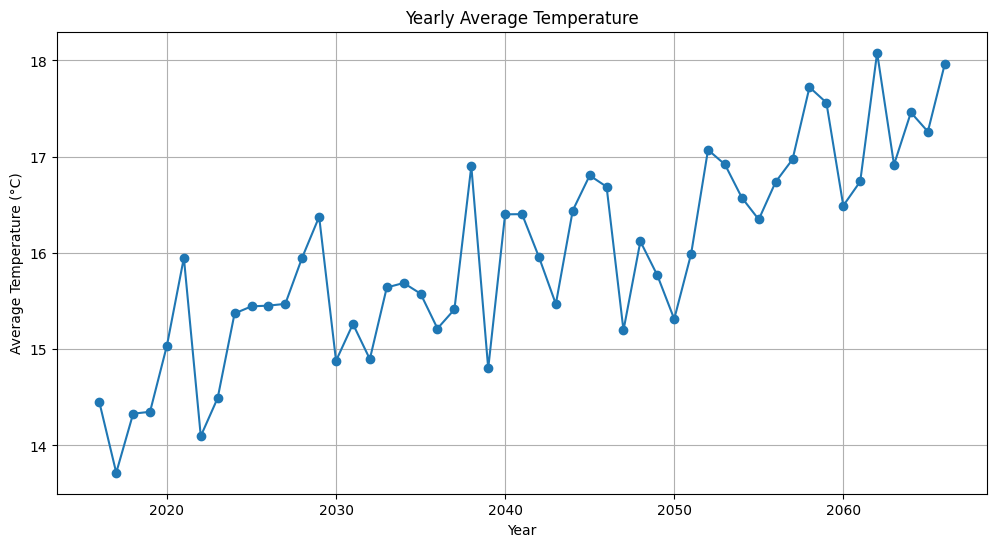

In [130]:


# Set time column as the index
cmip6_585_projection_df.set_index('time', inplace=True)

# Resample to yearly frequency and calculate mean temperature
yearly_avg_temp = cmip6_585_projection_df['tas'].resample('YE').mean()

# Plot the yearly average temperature
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_temp, marker='o', linestyle='-')
plt.title('Yearly Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()


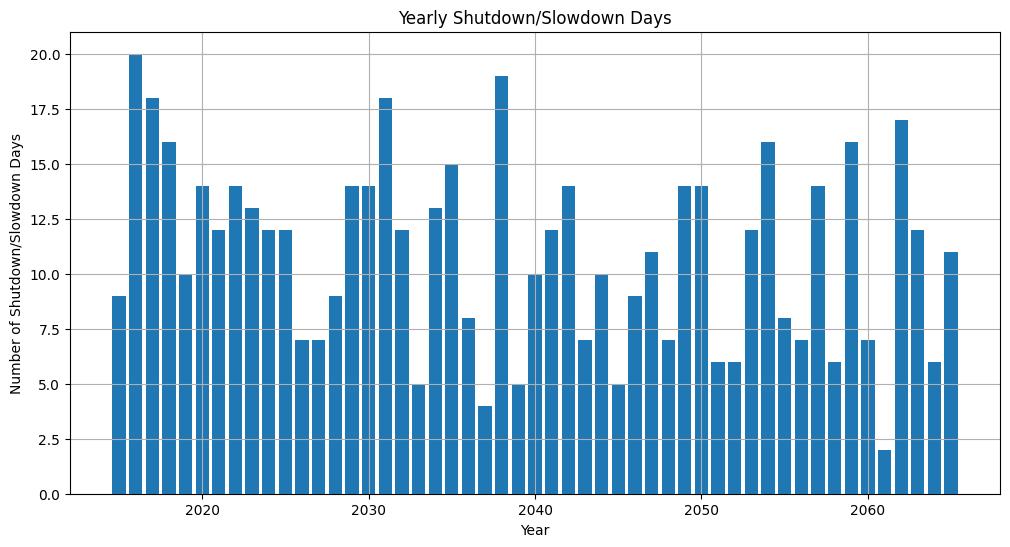

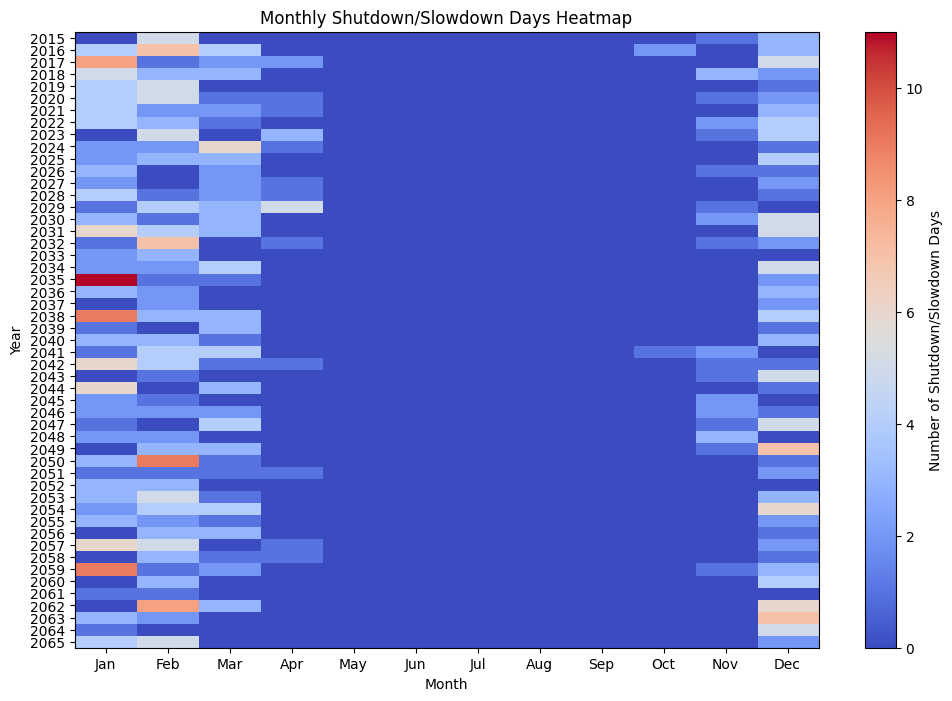

In [131]:
# Extract year and month from the datetime index
cmip6_585_projection_df['year'] = cmip6_585_projection_df.index.year
cmip6_585_projection_df['month'] = cmip6_585_projection_df.index.month

# Calculate the number of shutdown/slowdown days per year
yearly_shutdown_days = cmip6_585_projection_df.groupby('year')['ice_day_shutdown'].sum()

# Plot the yearly shutdown/slowdown days
plt.figure(figsize=(12, 6))
plt.bar(yearly_shutdown_days.index, yearly_shutdown_days.values)
plt.title('Yearly Shutdown/Slowdown Days')
plt.xlabel('Year')
plt.ylabel('Number of Shutdown/Slowdown Days')
plt.grid(True)
plt.show()

# Calculate the number of shutdown/slowdown days per month
monthly_shutdown_days = cmip6_585_projection_df.groupby(['year', 'month'])['ice_day_shutdown'].sum().unstack()

# Plot the monthly shutdown/slowdown days as a heatmap
plt.figure(figsize=(12, 8))
plt.imshow(monthly_shutdown_days, aspect='auto', cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Number of Shutdown/Slowdown Days')
plt.title('Monthly Shutdown/Slowdown Days Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(ticks=range(len(monthly_shutdown_days.index)), labels=monthly_shutdown_days.index)
plt.show()


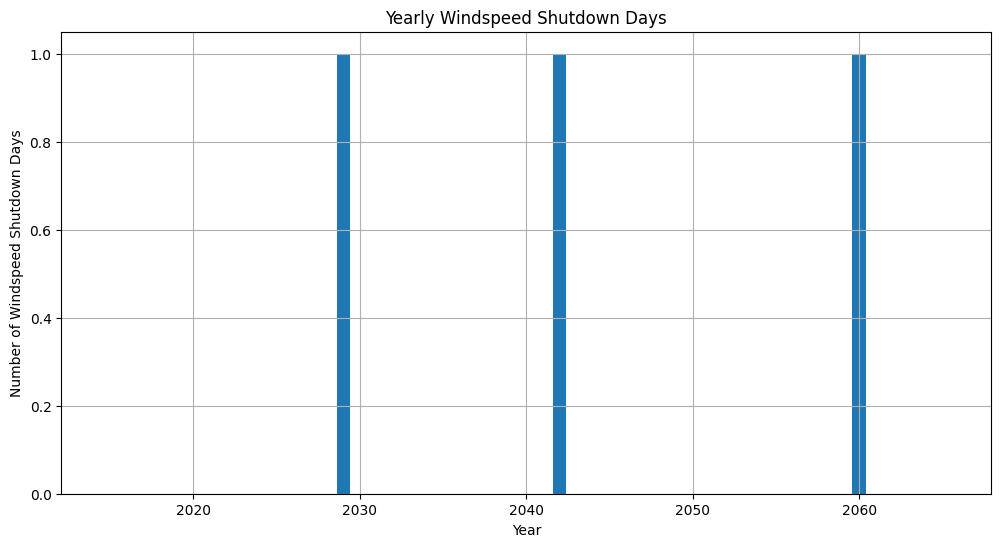

In [132]:
# Calculate the number of windspeed shutdown days per year
yearly_windspeed_shutdown = cmip6_585_projection_df.groupby('year')['windspeed_shutdown'].sum()

# Plot the yearly windspeed shutdown days
plt.figure(figsize=(12, 6))
plt.bar(yearly_windspeed_shutdown.index, yearly_windspeed_shutdown.values)
plt.title('Yearly Windspeed Shutdown Days')
plt.xlabel('Year')
plt.ylabel('Number of Windspeed Shutdown Days')
plt.grid(True)
plt.show()


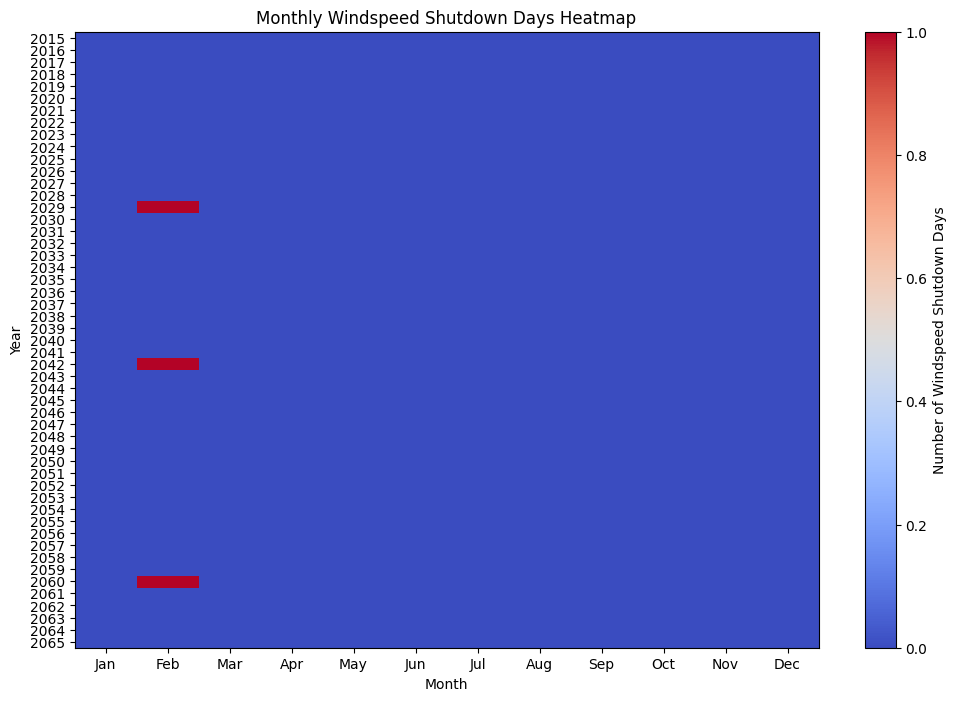

In [133]:
# Calculate the number of windspeed shutdown days per month
monthly_windspeed_shutdown = cmip6_585_projection_df.groupby(['year', 'month'])['windspeed_shutdown'].sum().unstack()

# Plot the monthly windspeed shutdown days as a heatmap
plt.figure(figsize=(12, 8))
plt.imshow(monthly_windspeed_shutdown, aspect='auto', cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Number of Windspeed Shutdown Days')
plt.title('Monthly Windspeed Shutdown Days Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(ticks=range(len(monthly_windspeed_shutdown.index)), labels=monthly_windspeed_shutdown.index)
plt.show()


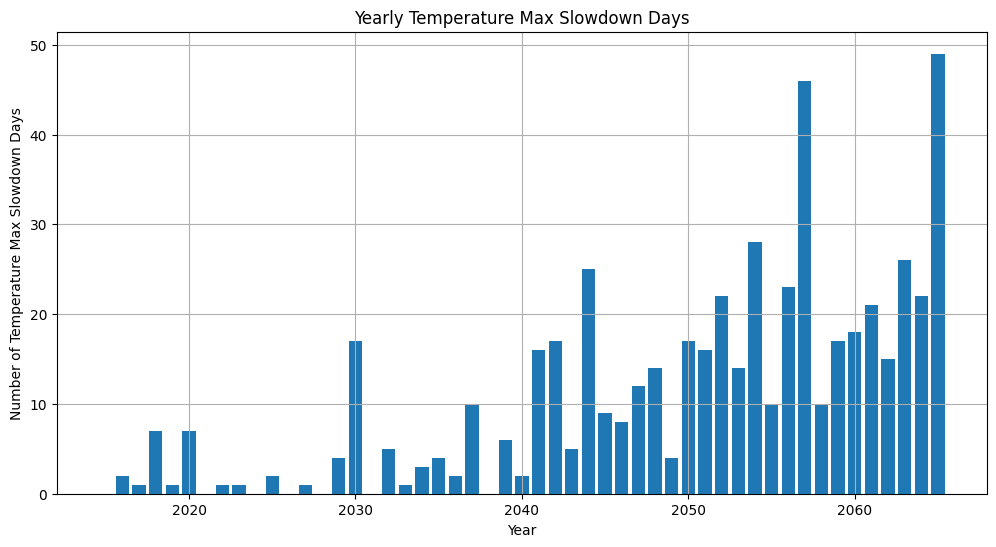

In [134]:
# Calculate the number of temperature max slowdown days per year
yearly_temp_max_slowdown = cmip6_585_projection_df.groupby('year')['temp_max_slowdown'].sum()

# Plot the yearly temperature max slowdown days
plt.figure(figsize=(12, 6))
plt.bar(yearly_temp_max_slowdown.index, yearly_temp_max_slowdown.values)
plt.title('Yearly Temperature Max Slowdown Days')
plt.xlabel('Year')
plt.ylabel('Number of Temperature Max Slowdown Days')
plt.grid(True)
plt.show()


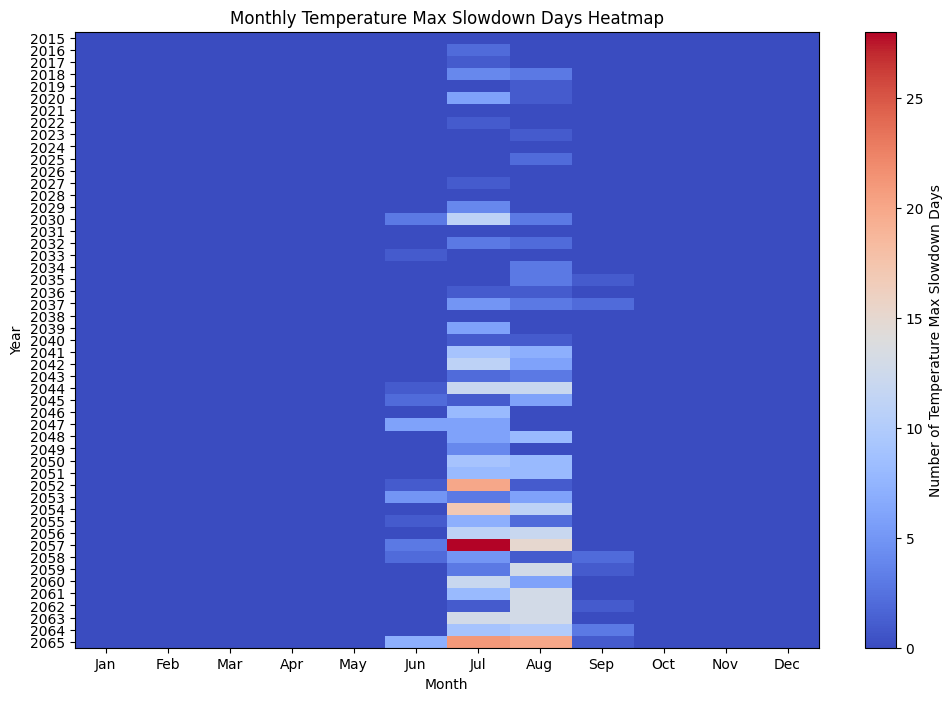

In [136]:
# Calculate the number of temperature max slowdown days per month
monthly_temp_max_slowdown = cmip6_585_projection_df.groupby(['year', 'month'])['temp_max_slowdown'].sum().unstack()

# Plot the monthly temperature max slowdown days as a heatmap
plt.figure(figsize=(12, 8))
plt.imshow(monthly_temp_max_slowdown, aspect='auto', cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Number of Temperature Max Slowdown Days')
plt.title('Monthly Temperature Max Slowdown Days Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(ticks=range(len(monthly_temp_max_slowdown.index)), labels=monthly_temp_max_slowdown.index)
plt.show()


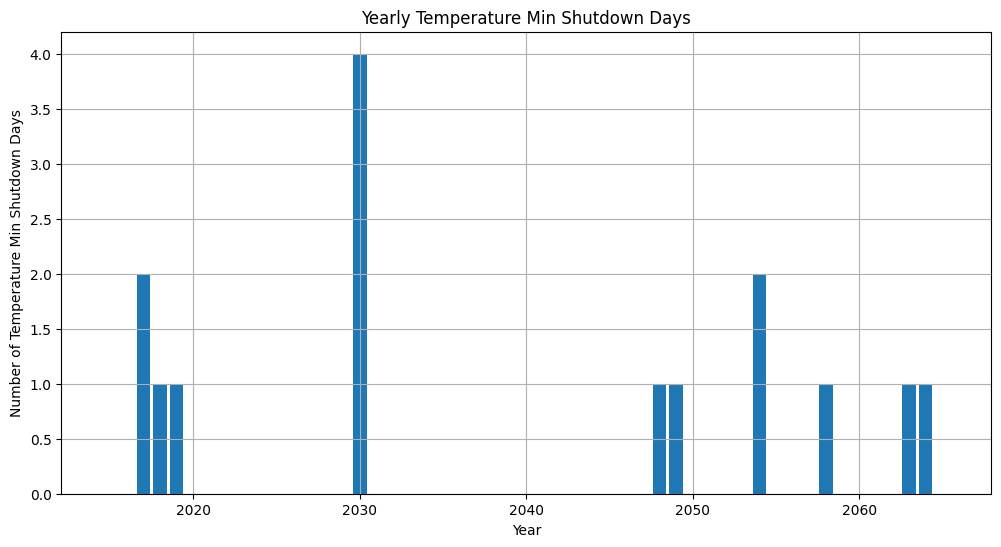

In [137]:
# Calculate the number of temperature min shutdown days per year
yearly_temp_min_shutdown = cmip6_585_projection_df.groupby('year')['temp_min_shutdown'].sum()

# Plot the yearly temperature min shutdown days
plt.figure(figsize=(12, 6))
plt.bar(yearly_temp_min_shutdown.index, yearly_temp_min_shutdown.values)
plt.title('Yearly Temperature Min Shutdown Days')
plt.xlabel('Year')
plt.ylabel('Number of Temperature Min Shutdown Days')
plt.grid(True)
plt.show()


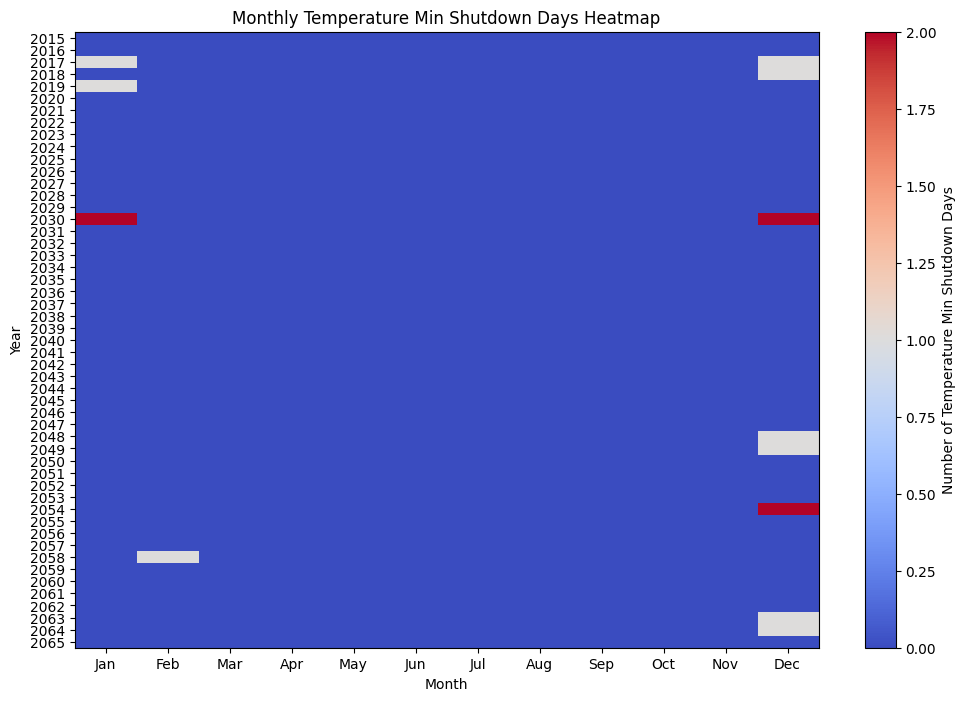

In [138]:
# Calculate the number of temperature min shutdown days per month
monthly_temp_min_shutdown = cmip6_585_projection_df.groupby(['year', 'month'])['temp_min_shutdown'].sum().unstack()

# Plot the monthly temperature min shutdown days as a heatmap
plt.figure(figsize=(12, 8))
plt.imshow(monthly_temp_min_shutdown, aspect='auto', cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Number of Temperature Min Shutdown Days')
plt.title('Monthly Temperature Min Shutdown Days Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(ticks=range(len(monthly_temp_min_shutdown.index)), labels=monthly_temp_min_shutdown.index)
plt.show()


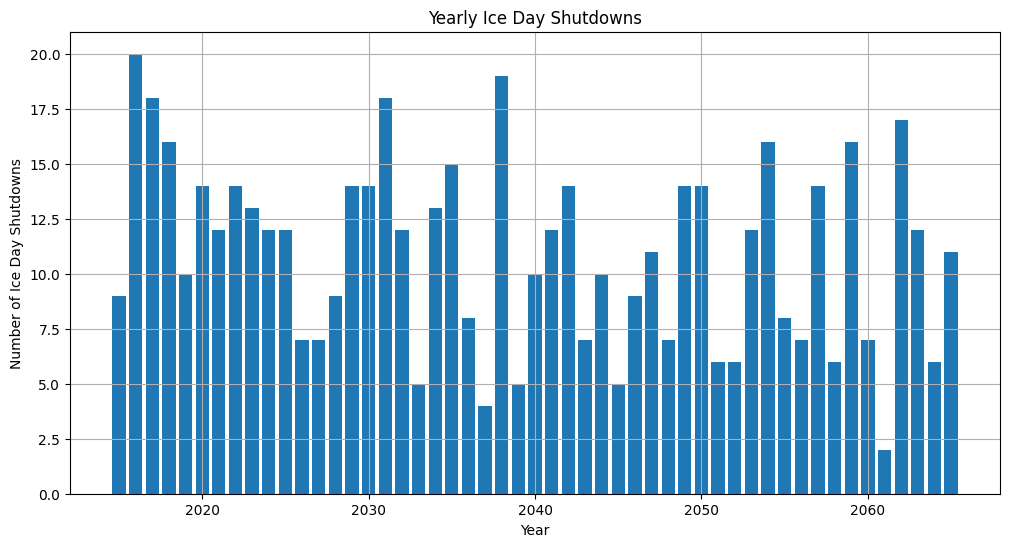

In [139]:
# Calculate the number of ice day shutdowns per year
yearly_ice_day_shutdown = cmip6_585_projection_df.groupby('year')['ice_day_shutdown'].sum()

# Plot the yearly ice day shutdowns
plt.figure(figsize=(12, 6))
plt.bar(yearly_ice_day_shutdown.index, yearly_ice_day_shutdown.values)
plt.title('Yearly Ice Day Shutdowns')
plt.xlabel('Year')
plt.ylabel('Number of Ice Day Shutdowns')
plt.grid(True)
plt.show()


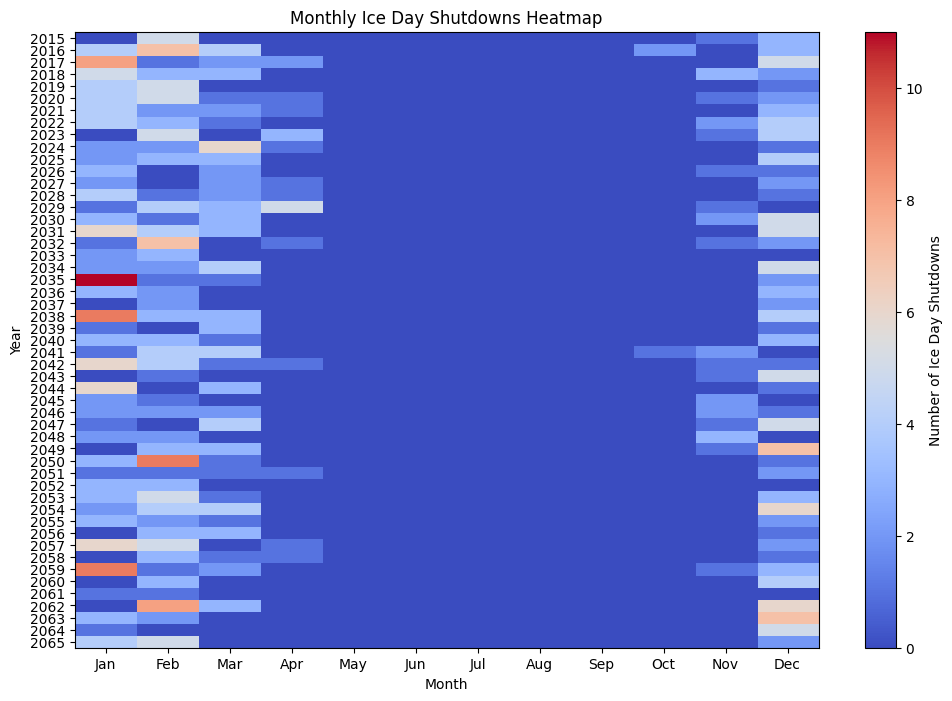

In [140]:
# Calculate the number of ice day shutdowns per month
monthly_ice_day_shutdown = cmip6_585_projection_df.groupby(['year', 'month'])['ice_day_shutdown'].sum().unstack()

# Plot the monthly ice day shutdowns as a heatmap
plt.figure(figsize=(12, 8))
plt.imshow(monthly_ice_day_shutdown, aspect='auto', cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Number of Ice Day Shutdowns')
plt.title('Monthly Ice Day Shutdowns Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(ticks=range(len(monthly_ice_day_shutdown.index)), labels=monthly_ice_day_shutdown.index)
plt.show()


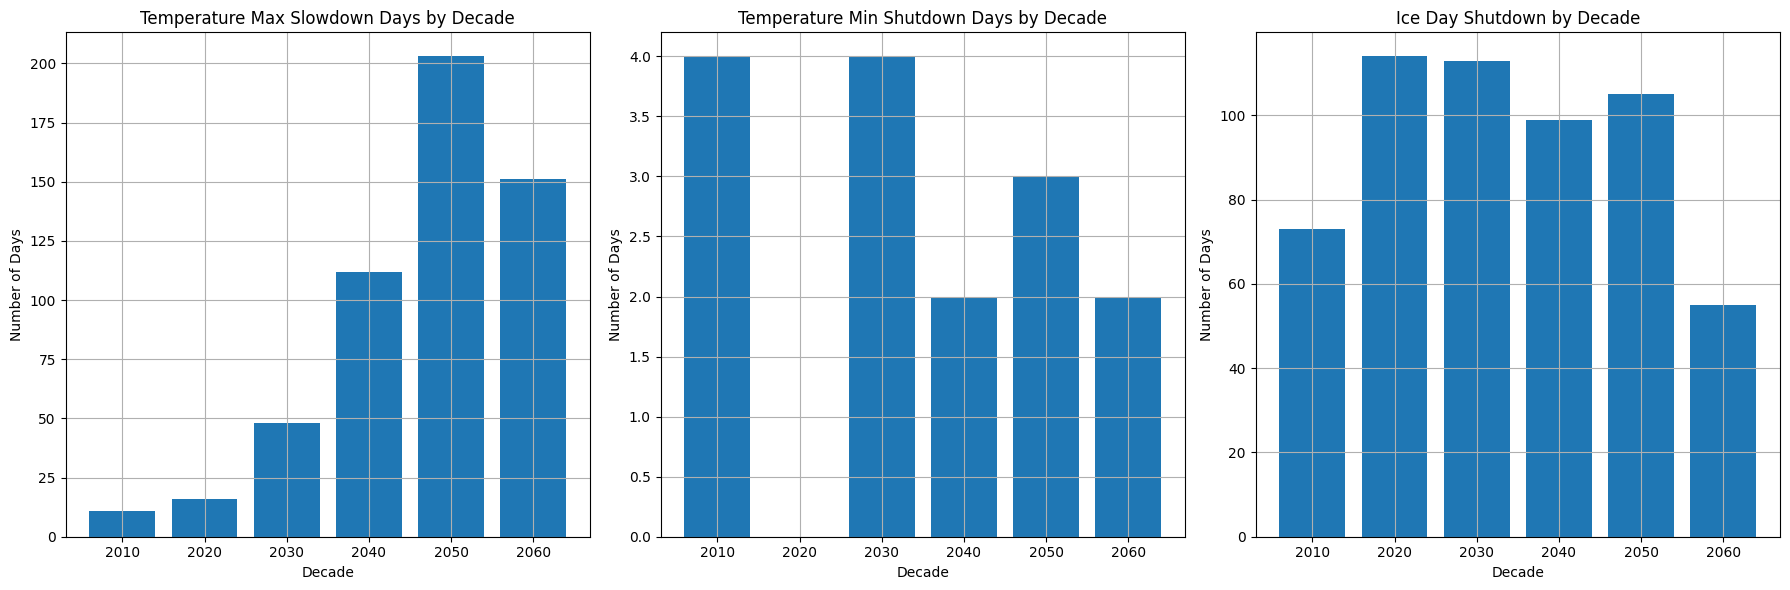

In [142]:


# Group by decade and calculate the sum of each type of day
decade_summary = cmip6_585_projection_df.groupby('decade').sum()[['temp_max_slowdown', 'temp_min_shutdown', 'ice_day_shutdown']]

# Plot the results
plt.figure(figsize=(18, 6))

# Temperature Max Slowdown Days by Decade
plt.subplot(1, 3, 1)
plt.bar(decade_summary.index, decade_summary['temp_max_slowdown'], width=8)
plt.title('Temperature Max Slowdown Days by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Days')
plt.grid(True)

# Temperature Min Shutdown Days by Decade
plt.subplot(1, 3, 2)
plt.bar(decade_summary.index, decade_summary['temp_min_shutdown'], width=8)
plt.title('Temperature Min Shutdown Days by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Days')
plt.grid(True)

# Ice Day Shutdown by Decade
plt.subplot(1, 3, 3)
plt.bar(decade_summary.index, decade_summary['ice_day_shutdown'], width=8)
plt.title('Ice Day Shutdown by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Days')
plt.grid(True)

plt.tight_layout()
plt.show()

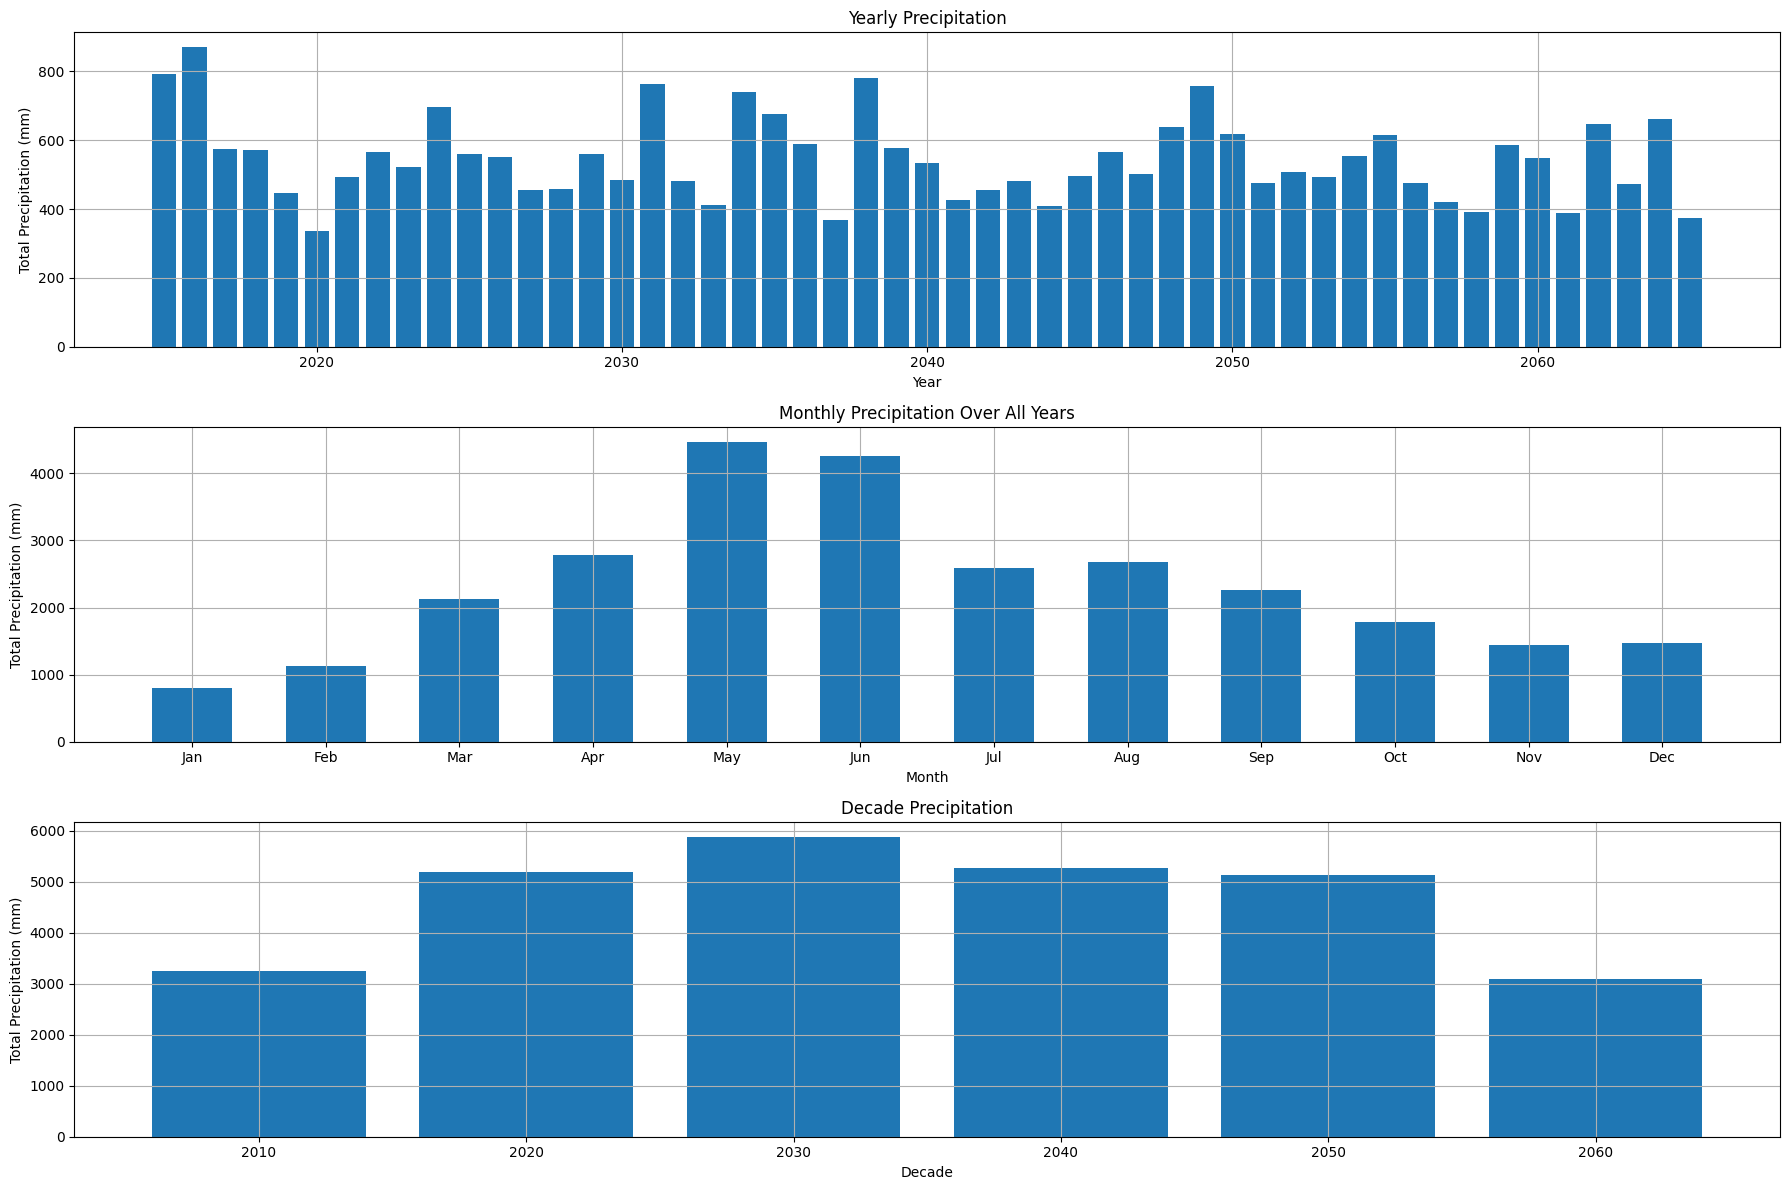

In [143]:
cmip6_585_projection_df['decade'] = (cmip6_585_projection_df['year'] // 10) * 10
cmip6_585_projection_df['year'] = cmip6_585_projection_df.index.year
cmip6_585_projection_df['month'] = cmip6_585_projection_df.index.month

# Calculate the sum of precipitation per year
yearly_precipitation = cmip6_585_projection_df.groupby('year')['pr'].sum()

# Calculate the sum of precipitation per month over all years
monthly_precipitation = cmip6_585_projection_df.groupby('month')['pr'].sum()

# Calculate the sum of precipitation per decade
decade_precipitation = cmip6_585_projection_df.groupby('decade')['pr'].sum()

# Plot the results

plt.figure(figsize=(18, 12))

# Yearly Precipitation
plt.subplot(3, 1, 1)
plt.bar(yearly_precipitation.index, yearly_precipitation.values)
plt.title('Yearly Precipitation')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm)')
plt.grid(True)

# Monthly Precipitation
plt.subplot(3, 1, 2)
plt.bar(monthly_precipitation.index, monthly_precipitation.values, width=0.6)
plt.title('Monthly Precipitation Over All Years')
plt.xlabel('Month')
plt.ylabel('Total Precipitation (mm)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Decade Precipitation
plt.subplot(3, 1, 3)
plt.bar(decade_precipitation.index, decade_precipitation.values, width=8)
plt.title('Decade Precipitation')
plt.xlabel('Decade')
plt.ylabel('Total Precipitation (mm)')
plt.grid(True)

plt.tight_layout()
plt.show()


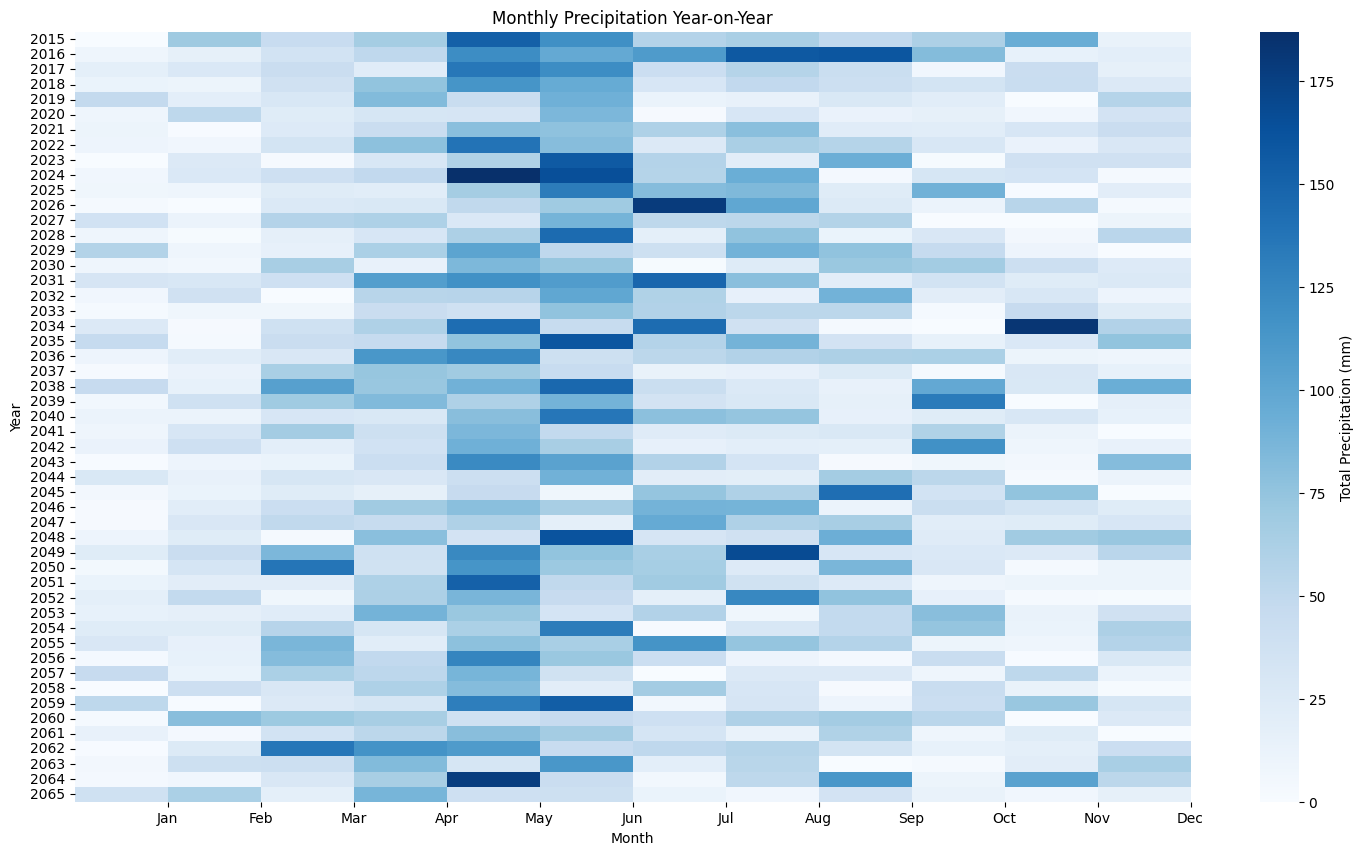

In [144]:
# Group by year and month and sum the precipitation
monthly_precipitation = cmip6_585_projection_df.groupby(['year', 'month'])['pr'].sum().unstack()

# Create a heatmap of the precipitation
plt.figure(figsize=(18, 10))
sns.heatmap(monthly_precipitation, cmap='Blues', annot=False, cbar_kws={'label': 'Total Precipitation (mm)'})
plt.title('Monthly Precipitation Year-on-Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(rotation=0)
plt.show()